In [5]:
# import packages
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import auc
import os
from scipy.integrate import odeint
from scipy.signal import find_peaks, peak_prominences
import scipy.integrate as spi
import scipy.stats as st
from array import *
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator
import scipy.io as io
import math
import random
import pickle
from sklearn.metrics import r2_score
#from scipy.interpolate import CubicSpline
#from ipynb.fs.full.All_Functions import GetPopParams
#from ipynb.fs.full.All_Functions import GetPopParamsOmega
#from ipynb.fs.full.All_Functions import GetVLIndParams
#from ipynb.fs.full.All_Functions import RandVLIndParams
#from ipynb.fs.full.All_Functions import RandVLParams
#from ipynb.fs.full.All_Functions import PKPDParams
#from ipynb.fs.full.All_Functions import Cohort_Prep
#from ipynb.fs.full.All_Functions import VLModel
#from ipynb.fs.full.All_Functions import VLPKPD
#from ipynb.fs.full.All_Functions import PK_Model
#from ipynb.fs.full.All_Functions import PD_Model
#from ipynb.fs.full.All_Functions import SetInit
#from ipynb.fs.full.All_Functions import SimulateTreatment
#from ipynb.fs.full.All_Functions import Trial_Simulation
#from ipynb.fs.full.All_Functions import Trial_Simulation_paramInput
#from ipynb.fs.full.All_Functions import SimulateTreatmentPK
#from ipynb.fs.full.All_Functions import TreatmentImpact
#from ipynb.fs.full.All_Functions import CI_Calc
#from ipynb.fs.full.All_Functions import ParamsPrep
%matplotlib inline

In [6]:
def StandardDoseTimeSim(TrtmntStrtDay, params, 
                        PKPDInd, param_dict, PotRed, MolMass, dose, SetInit, VLPKPD,
                       TreatmentLength = 5, TreatmentFrequency = 0.5):
    X = []
    times = []
    for idi, tstart, in enumerate(TrtmntStrtDay):
        t, y, dosetimes = Trial_Simulation_paramInput(tstart, params[idi][:], 
                                                      PKPDInd[idi], param_dict[idi], 
                                                      PotRed, MolMass, dose, SetInit, VLPKPD,
                               TreatmentLength = TreatmentLength, TreatmentFrequency = TreatmentFrequency)
        T,R,E,I,V, Ag, A1, A2 = y.T
        X.append(np.log10(np.maximum(V,500)))
       # X[idi][X[idi]==2]=1
        times.append(t)
    return X, times

In [7]:
import warnings
warnings.filterwarnings("ignore")

## Data

In [8]:
##  --- Within-host parameters


data_file = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-SharedLibraries-FredHutchinsonCancerResearchCenter/Schiffer Group - Shared Resources - SARSCoV2ComboModeling/Within-Host Viral Dynamics Model/NBACohort/NBA_1510infections_7BroadVariants.csv'
Data_df = pd.read_csv(data_file)
Data_unVacc = Data_df[(Data_df.cat_VaccStatus!='Boosted')*(Data_df.cat_VaccStatus!='Second dose')*(Data_df.cat_VaccStatus!='First dose') ]
Data_unVacc_symp = Data_unVacc[Data_unVacc.cat_SympEver != 'No']
IDs_Symp = Data_unVacc_symp.ID.unique()
print(Data_unVacc_symp.cat_Lineage7variants.unique())

Noexposure = len(Data_unVacc_symp[(Data_unVacc_symp.cat_CumulativeExposure==1)].ID.unique())
exposure = len(Data_unVacc_symp[(Data_unVacc_symp.cat_CumulativeExposure!=1)].ID.unique())

IndParameters = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-SharedLibraries-FredHutchinsonCancerResearchCenter/Schiffer Group - Shared Resources - SARSCoV2ComboModeling/Within-Host Viral Dynamics Model/NBACohort/getModes_Run004/IndividualParameters/estimatedIndividualParameters.txt'
PopParameters = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-SharedLibraries-FredHutchinsonCancerResearchCenter/Schiffer Group - Shared Resources - SARSCoV2ComboModeling/Within-Host Viral Dynamics Model/NBACohort/getModes_Run004/populationParameters.txt'

parameters_df = pd.read_csv(IndParameters)
Popparameters_df = pd.read_csv(PopParameters)
## --------------------- PK parameters -----------------------------
Indparameters_MPV_file = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-SharedLibraries-FredHutchinsonCancerResearchCenter/Schiffer Group - Shared Resources - SARSCoV2ComboModeling/PK-PD Modeling/MPVestimatedIndividualParameters.txt'
Popparameters_MPV_file = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-SharedLibraries-FredHutchinsonCancerResearchCenter/Schiffer Group - Shared Resources - SARSCoV2ComboModeling/PK-PD Modeling/MPVpopulationParameters.txt'
#data_file = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/PK-PD/NBACohort/NBA_FreqTestersAppendNegativesToAll.csv'



Indparameters_MPV = pd.read_csv(Indparameters_MPV_file)
Popparameters_MPV = pd.read_csv(Popparameters_MPV_file)
#print(Popparameters_MPV)




['Historic' 'Alpha' 'Delta' 'Omicron' 'Gamma' 'None']


In [14]:
#Loaindg VL and AUC data from other notebooks
drop_VL_Panoramic_Cntrl = pickle.load(open('TotVdrop_Cntrl_PANORAMIC_trialpartis.pickle', 'rb')) 
drop_VL_Panoramic =pickle.load(open('TotVdrop_PANORAMIC_trialpartis.pickle', 'rb'))  
drop_VL_active_Panoramic= pickle.load(open('activeVdrop_PANORAMIC_trialpartis.pickle', 'rb'))

AUC_Panoramic_Cntrl = pickle.load(open('AUC_Cntrl_PANORAMIC_trialpartis.pickle', 'rb')) 
AUC_Panoramic = pickle.load(open('AUC_PANORAMIC_trialpartis.pickle', 'rb')) 
AUC_active_Panoramic= pickle.load(open('activeAUC_PANORAMIC_trialpartis.pickle', 'rb'))



drop_VL_Moveout_Cntrl = pickle.load(open('TotVdrop_Cntrl_MOVeOUT.pickle', 'rb')) 
drop_VL_Moveout = pickle.load(open('TotVdrop_MOveOUT_Emax=1.pickle', 'rb')) 
drop_VL_active_Moveout = pickle.load(open('activeVdrop_MOveOUT_Emax=1.pickle', 'rb')) 

AUC_Moveout_Cntrl = pickle.load(open('AUC_Cntrl_MOVeOUT.pickle', 'rb')) 
AUC_Moveout = pickle.load(open('AUC_TotVdrop_MOveOUT.pickle', 'rb')) 
AUC_active_Moveout = pickle.load(open('AUC_activeVdrop_MOveOUT.pickle', 'rb')) 



drop_VL_PLATCOV_Cntrl = pickle.load(open('TotVdrop_Cntrl_PLATCOV_trialpartis.pickle', 'rb')) 
drop_VL_PLATCOV = pickle.load(open('TotVdrop_PLATCOV_trialpartis.pickle', 'rb')) 
drop_VL_active_PLATCOV = pickle.load(open('activeVdrop_PLATCOV_trialpartis.pickle', 'rb'))



AUC_PLATCOV_Cntrl = pickle.load(open('AUC_Cntrl_PLATCOV_trialpartis.pickle', 'rb'))  
AUC_PLATCOV = pickle.load(open('AUC_PLATCOV_trialpartis.pickle', 'rb')) 
AUC_active_PLATCOV = pickle.load(open('activeAUC_PLATCOV_trialpartis.pickle', 'rb'))



In [15]:
drop_day5 = []
AUC_5 = []
AUC_baseTo16 = []
t5 = np.argwhere(np.linspace(0, 14.999, 15000)>=5)[0][0]
for trial, drop_contrl, drop, drop_active in zip(['PLATCOV','PANORAMIC', 'MOVe_OUT'], 
                                    [ drop_VL_PLATCOV_Cntrl, drop_VL_Panoramic_Cntrl,drop_VL_Moveout_Cntrl],
                                    [drop_VL_PLATCOV, drop_VL_Panoramic, drop_VL_Moveout],
                                   [ drop_VL_active_PLATCOV, drop_VL_active_Panoramic,drop_VL_active_Moveout]):
    for ind in range(0,len(drop_contrl)):
        drop_day5.append({'Trial': trial, 'log10_VL_drop': drop_contrl[ind][t5], 'viral_load': 'total viral RNA off-treatment'})
    for ind in range(0,len(drop)):    
        drop_day5.append({'Trial': trial, 'log10_VL_drop': drop[ind][t5], 'viral_load': 'total viral RNA on-treatment'})
        drop_day5.append({'Trial': trial, 'log10_VL_drop': drop_active[ind][t5], 'viral_load': 'non-mutated viral RNA'})
        
        
drop_day5 = pd.DataFrame(drop_day5)

for trial, AUC_contrl, AUC, AUC_active in zip(['PLATCOV','PANORAMIC', 'MOVe_OUT'], 
                                    [AUC_PLATCOV_Cntrl,AUC_Panoramic_Cntrl, AUC_Moveout_Cntrl],
                                    [AUC_PLATCOV,  AUC_Panoramic, AUC_Moveout],
                                   [AUC_active_PLATCOV,  AUC_active_Panoramic, AUC_active_Moveout]):
    for ind in range(0,len(AUC_contrl)):
        AUC_5.append({'Trial': trial, 'AUC': AUC_contrl[ind], 'viral_load': 'total viral RNA off-treatment'})
    for ind in range(0,len(AUC)):
        AUC_5.append({'Trial': trial, 'AUC': AUC[ind], 'viral_load': 'total viral RNA on-treatment'})
        AUC_5.append({'Trial': trial, 'AUC': AUC_active[ind], 'viral_load': 'non-mutated viral RNA'})
        
        
AUC_5 = pd.DataFrame(AUC_5)


In [16]:
AUC_5

,Trial,AUC,viral_load
0,PLATCOV,18.082619,total viral RNA off-treatment
1,PLATCOV,10.890572,total viral RNA off-treatment
2,PLATCOV,22.568439,total viral RNA off-treatment
3,PLATCOV,33.177693,total viral RNA off-treatment
4,PLATCOV,20.250032,total viral RNA off-treatment
...,...,...,...
1528,MOVe_OUT,21.882775,non-mutated viral RNA
1529,MOVe_OUT,22.406217,total viral RNA on-treatment
1530,MOVe_OUT,20.300742,non-mutated viral RNA
1531,MOVe_OUT,29.860166,total viral RNA on-treatment


In [26]:
np.mean(drop_day5[(drop_day5.Trial=='MOVe_OUT') & (drop_day5.viral_load=='total viral RNA on-treatment')].log10_VL_drop)

-1.968170020407852

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

MOVe_OUT_total viral RNA off-treatment vs. MOVe_OUT_total viral RNA on-treatment: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.773e-05 U_stat=9.525e+04
MOVe_OUT_total viral RNA on-treatment vs. MOVe_OUT_non-mutated viral RNA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=8.098e+04
PANORAMIC_total viral RNA on-treatment vs. PANORAMIC_non-mutated viral RNA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.139e-01 U_stat=9.625e+02
PLATCOV_total viral RNA off-treatment vs. PLATCOV_total viral RNA on-treatment: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.953e-07 U_stat=4.239e+03
PLATCOV_total viral RNA on-treatment vs. PLATCOV_non-mutated viral RNA: Mann-Whitney-Wilcoxon test two-sided with B

Text(74.875, 0.5, 'log10(VL) drop \n on day 5')

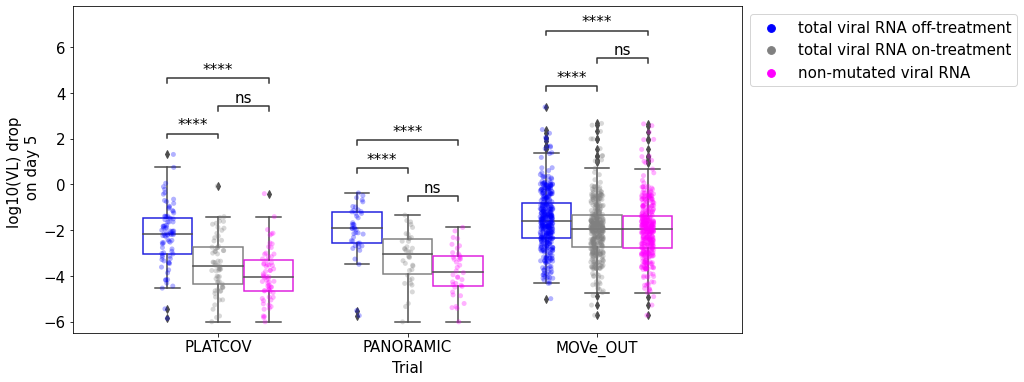

In [31]:
fig = plt.figure(figsize = (12,6))
plt.rcParams.update({'font.size': 15})
#handles, labels = ax.get_legend_handles_labels()
my_pal = {"total viral RNA off-treatment": "blue", "total viral RNA on-treatment": "grey", "non-mutated viral RNA": "magenta"}
ax = sns.stripplot(x='Trial', y='log10_VL_drop', data = drop_day5, hue = 'viral_load', palette = my_pal, 
                   alpha = 0.3, dodge=True)
handles, labels = ax.get_legend_handles_labels()
ax = sns.boxplot(x='Trial', y = 'log10_VL_drop', data = drop_day5, hue = 'viral_load', palette = my_pal)
for p in ax.patches:
    mybox =p
    r,g,b,a = mybox.get_facecolor()
    mybox.set_facecolor((0, 0, 0, 0))
    mybox.set_edgecolor((r, g, b, 1))
    



ax.legend(handles, labels, fontsize = 15, bbox_to_anchor=(1, 1))

pairs = [[('MOVe_OUT', 'total viral RNA off-treatment'),('MOVe_OUT', 'total viral RNA on-treatment')], 
         [('MOVe_OUT', 'total viral RNA off-treatment'),('MOVe_OUT', 'non-mutated viral RNA')] ,
         [('MOVe_OUT', 'total viral RNA on-treatment'),('MOVe_OUT', 'non-mutated viral RNA')],
         [('PLATCOV', 'total viral RNA off-treatment'),('PLATCOV', 'total viral RNA on-treatment')], 
          [('PLATCOV', 'total viral RNA off-treatment'),('PLATCOV', 'non-mutated viral RNA')],
          [('PLATCOV', 'total viral RNA on-treatment'),('PLATCOV', 'non-mutated viral RNA')],
          [('PANORAMIC', 'total viral RNA off-treatment'),('PANORAMIC', 'total viral RNA on-treatment')], 
         [('PANORAMIC', 'total viral RNA off-treatment'),('PANORAMIC', 'non-mutated viral RNA')],
        [('PANORAMIC', 'total viral RNA on-treatment'),('PANORAMIC', 'non-mutated viral RNA')]]
        
annotator = Annotator(ax, pairs, data=drop_day5, x='Trial', y='log10_VL_drop', hue='viral_load')
annotator.configure(test = 'Mann-Whitney', comparisons_correction="bonferroni").apply_and_annotate()
plt.ylabel('log10(VL) drop \n on day 5')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

MOVe_OUT_total viral RNA off-treatment vs. MOVe_OUT_total viral RNA on-treatment: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.318e-03 U_stat=9.241e+04
MOVe_OUT_total viral RNA on-treatment vs. MOVe_OUT_non-mutated viral RNA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:9.720e-05 U_stat=9.438e+04
PANORAMIC_total viral RNA on-treatment vs. PANORAMIC_non-mutated viral RNA: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:5.728e-05 U_stat=1.157e+03
PLATCOV_total viral RNA off-treatment vs. PLATCOV_total viral RNA on-treatment: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.700e-01 U_stat=3.382e+03
PLATCOV_total viral RNA on-treatment vs. PLATCOV_non-mutated viral RNA: Mann-Whitney-Wilcoxon test two-sided with B

Text(78.0, 0.5, 'AUC(during treatment)')

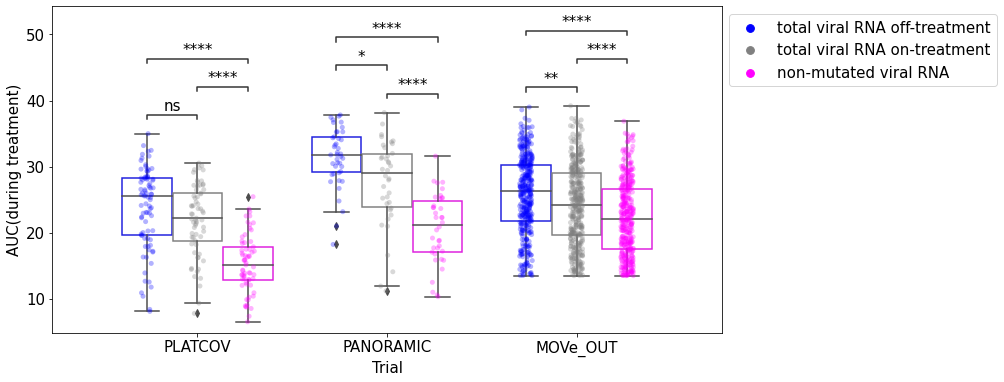

In [30]:
t_5 = np.argwhere(np.linspace(0, 14.999, 15000)>=5)[0][0]fig = plt.figure(figsize = (12,6))
plt.rcParams.update({'font.size': 15})
#handles, labels = ax.get_legend_handles_labels()
my_pal = {"total viral RNA off-treatment": "blue", "total viral RNA on-treatment": "grey", "non-mutated viral RNA": "magenta"}
ax = sns.stripplot(x='Trial', y='AUC', data = AUC_5, hue = 'viral_load', palette = my_pal, 
                   alpha = 0.3, dodge=True)
handles, labels = ax.get_legend_handles_labels()
ax = sns.boxplot(x='Trial', y = 'AUC', data = AUC_5, hue = 'viral_load', palette = my_pal)
for p in ax.patches:
    mybox =p
    r,g,b,a = mybox.get_facecolor()
    mybox.set_facecolor((0, 0, 0, 0))
    mybox.set_edgecolor((r, g, b, 1))
    



ax.legend(handles, labels, fontsize = 15, bbox_to_anchor=(1, 1))

pairs = [[('MOVe_OUT', 'total viral RNA off-treatment'),('MOVe_OUT', 'total viral RNA on-treatment')], 
         [('MOVe_OUT', 'total viral RNA off-treatment'),('MOVe_OUT', 'non-mutated viral RNA')] ,
         [('MOVe_OUT', 'total viral RNA on-treatment'),('MOVe_OUT', 'non-mutated viral RNA')],
         [('PLATCOV', 'total viral RNA off-treatment'),('PLATCOV', 'total viral RNA on-treatment')], 
          [('PLATCOV', 'total viral RNA off-treatment'),('PLATCOV', 'non-mutated viral RNA')],
          [('PLATCOV', 'total viral RNA on-treatment'),('PLATCOV', 'non-mutated viral RNA')],
          [('PANORAMIC', 'total viral RNA off-treatment'),('PANORAMIC', 'total viral RNA on-treatment')], 
         [('PANORAMIC', 'total viral RNA off-treatment'),('PANORAMIC', 'non-mutated viral RNA')],
        [('PANORAMIC', 'total viral RNA on-treatment'),('PANORAMIC', 'non-mutated viral RNA')]]
        
annotator = Annotator(ax, pairs, data=AUC_5, x='Trial', y='AUC', hue='viral_load')
annotator.configure(test = 'Mann-Whitney', comparisons_correction="bonferroni").apply_and_annotate()
plt.ylabel('AUC(during treatment)')

##### MOVe-OUT

In [19]:
t_5 = np.argwhere(np.linspace(0, 14.999, 15000)>=5)[0][0]

In [20]:
delta1 = np.mean(drop_VL_Moveout_Cntrl, axis = 0)-np.mean(drop_VL_Moveout, axis = 0)
delta2 = np.mean(drop_VL_Moveout_Cntrl, axis = 0)-np.mean(drop_VL_active_Moveout, axis = 0)
delta3 = np.mean(drop_VL_Moveout, axis = 0)-np.mean(drop_VL_active_Moveout, axis =0)
print(delta1[t5])
print(delta2[t5])
print(delta3[t5])

0.394376859973532
0.4134313275892427
0.019054467615710724


##### PLATCOV

In [20]:
delta1 = np.mean(drop_VL_PLATCOV_Cntrl, axis = 0)-np.mean(drop_VL_PLATCOV, axis = 0)
delta2 = np.mean(drop_VL_PLATCOV_Cntrl, axis = 0)-np.mean(drop_VL_active_PLATCOV, axis = 0)
delta3 = np.mean(drop_VL_PLATCOV, axis =0)-np.mean(drop_VL_active_PLATCOV, axis = 0)
print(delta1[t5])
print(delta2[t5])
print(delta3[t5])

1.2667457078066802
1.7533673112737058
0.48662160346702565


##### Panoramic

In [22]:
delta1 = np.mean(drop_VL_Panoramic_Cntrl, axis = 0)-np.mean(drop_VL_Panoramic, axis = 0)
delta2 = np.mean(drop_VL_Panoramic_Cntrl, axis = 0)-np.mean(drop_VL_active_Panoramic, axis = 0)
delta3 = np.mean(drop_VL_Panoramic, axis = 0)-np.mean(drop_VL_active_Panoramic, axis = 0)
print(delta1[t5])
print(delta2[t5])
print(delta3[t5])

1.2062776315588555
1.801902938632609
0.5956253070737536
